### IDs:
Insert yours IDs to the cell below

ID #1: 806646 - Omri Newman


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [73]:
import numpy as np
from numpy.core.numeric import NaN
import pandas as pd
from collections import Counter
from pathlib import Path 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import metrics
import statistics
import random
import math
from scipy.stats import binom, multinomial 
from scipy import stats
from sklearn import preprocessing
from scipy.stats import truncnorm

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

$X~Binom(n,0.03)$ \\
$P(x>=1)=0.85$ \\
$1-P(x<1)=0.85$ \\
$1-cdf(1)=0.85$ \\
$1-P(x=0)=0.85$

In [74]:
def atleast_one(p, k):
    """This function calculates the number of samples required in order to have 
    a 'k' probability of seeing at least one defective product in the sample 
    with a 'p' percent defective rate. 
    
    Manipulating the PMF for n=0 yields the following closed form formula that 
    can be used generically when trying to find at least one defective product 
    with any confidence 'k' and defective rate 'p'. 
    """
    return math.ceil(math.log(1-k, 1-p))

In [75]:
"""X ~ Binom(n, 0.03) and we want to find 'n' such that P(x>=1)=0.85 or 
alternatively [1-P(x=0)]=0.85"""
atleast_one(0.03, 0.85)

63

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

$X~Binom(n,0.04)$ \\
$P(x>=1)=0.95$ \\
$1-P(x<1)=0.95$ \\
$1-P(x=0)=0.95$ \\


In [76]:
"""X ~ Binom(n, 0.04) and we want to find 'n' such that P(x>=1)=0.95 or 
alternatively [1-P(x=0)]=0.95"""
atleast_one(0.04, 0.95)

74

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [77]:
def how_many_samples(def_rate, prob, def_count):
  n=0
  initiate = 1-stats.binom.cdf(def_count-1, n, def_rate)
  while initiate < prob:
    n+=1
    initiate = 1-stats.binom.cdf(def_count-1, n, def_rate)
  return n

In [78]:
how_many_samples(0.1, 0.9, 5)

78

In [79]:
how_many_samples(0.3, 0.9, 15)

64

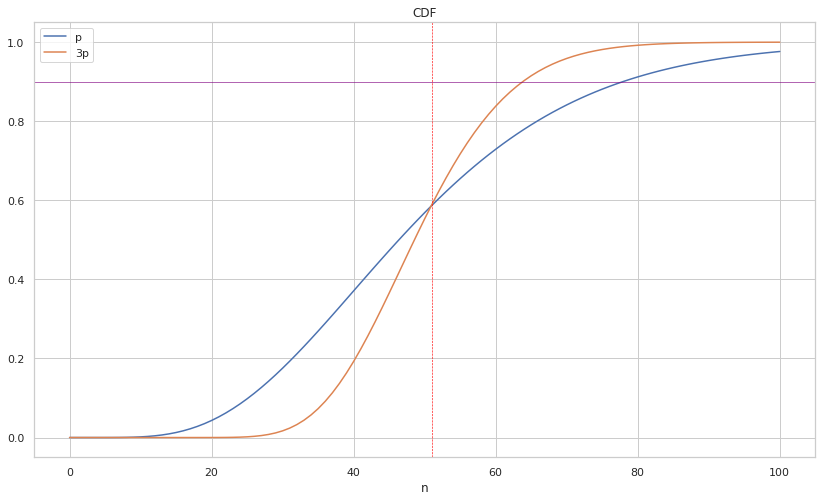

In [80]:
s = pd.DataFrame([1-stats.binom.cdf(14, i, 0.3) for i in range(101)]).rename({0:"3p"}, axis=1)
t = pd.DataFrame([1-stats.binom.cdf(4, i, 0.1) for i in range(101)]).rename({0:"p"}, axis=1)
df = t.join(s)
# df["sub"] = abs(df["p"] - df["3p"])
plt.rcParams.update({'font.size': 15})
df.plot(title="CDF", xlabel="n", figsize=(14,8));
plt.axhline(y=0.9, color='purple', linestyle='-', lw=0.6)
# plt.axhline(y=0.587, color='red', linestyle='--', lw=0.6)
plt.axvline(x=51, color='red', linestyle='--', lw=0.6);

The inflection point in the graph above shows us that at $n=51$, the probabilities of seeing at least $5$ and $15$ defective products for the two binomial distributions are the same, with probability $0.587$. Before this point, the first case will achieve a higher probability sooner of seeing $5$ defective products before the second case sees $15$ defective products. But after this point, the second case will achieve a higher probability sooner of seeing $15$ defective products before the first case sees $5$. To gain intuition for the relationship between defective rate and the number of defective samples, consider the plots below.

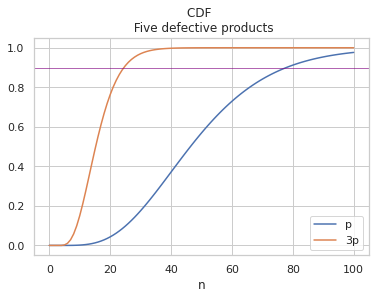

In [81]:
s = pd.DataFrame([1-stats.binom.cdf(4, i, 0.3) for i in range(101)]).rename({0:"3p"}, axis=1)
t = pd.DataFrame([1-stats.binom.cdf(4, i, 0.1) for i in range(101)]).rename({0:"p"}, axis=1)
df = t.join(s)
# df["sub"] = abs(df["p"] - df["3p"])
plt.rcParams.update({'font.size': 10})
df.plot(title="CDF \n Five defective products", xlabel="n");
plt.axhline(y=0.9, color='purple', linestyle='-', lw=0.6);
# plt.axhline(y=0.587, color='red', linestyle='--', lw=0.6)
# plt.axvline(x=51, color='red', linestyle='--', lw=0.6)

The number of samples required to reach a $90$% confidence of seeing at least five defective products in the sample is much higher when the defective rate is lower and vice versa.

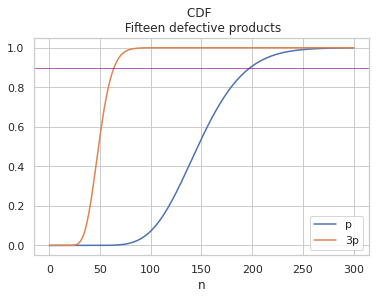

In [82]:
s = pd.DataFrame([1-stats.binom.cdf(14, i, 0.3) for i in range(301)]).rename({0:"3p"}, axis=1)
t = pd.DataFrame([1-stats.binom.cdf(14, i, 0.1) for i in range(301)]).rename({0:"p"}, axis=1)
df = t.join(s)
# df["sub"] = abs(df["p"] - df["3p"])
plt.rcParams.update({'font.size': 10})
df.plot(title="CDF \n Fifteen defective products", xlabel="n");
plt.axhline(y=0.9, color='purple', linestyle='-', lw=0.6);
# plt.axhline(y=0.587, color='red', linestyle='--', lw=0.6)
# plt.axvline(x=51, color='red', linestyle='--', lw=0.6)

The number of samples required to reach a $90$% confidence of seeing at least fifteen defective products in the sample is higher when the defective rate is lower and it's almost three times higher when compared to seeing at least five samples in the previous plot.

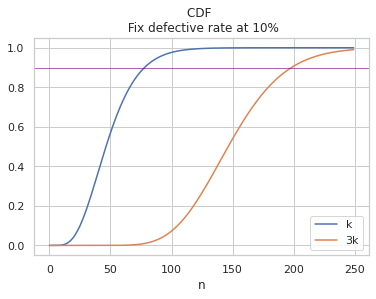

In [83]:
s = pd.DataFrame([1-stats.binom.cdf(14, i, 0.1) for i in range(250)]).rename({0:"3k"}, axis=1)
t = pd.DataFrame([1-stats.binom.cdf(4, i, 0.1) for i in range(250)]).rename({0:"k"}, axis=1)
df = t.join(s)
# df["sub"] = abs(df["p"] - df["3p"])
plt.rcParams.update({'font.size': 10})
df.plot(title="CDF \n Fix defective rate at 10%", xlabel="n");
plt.axhline(y=0.9, color='purple', linestyle='-', lw=0.6);
# plt.axhline(y=0.587, color='red', linestyle='--', lw=0.6)
# plt.axvline(x=51, color='red', linestyle='--', lw=0.6)

The number of samples required to reach a $90$% confidence of seeing at least five versus fifteen defective products in the sample when fixing the defective rate at $10$% is higher for fifteen than five.

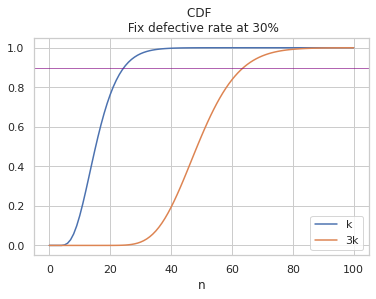

In [84]:
s = pd.DataFrame([1-stats.binom.cdf(14, i, 0.3) for i in range(101)]).rename({0:"3k"}, axis=1)
t = pd.DataFrame([1-stats.binom.cdf(4, i, 0.3) for i in range(101)]).rename({0:"k"}, axis=1)
df = t.join(s)
# df["sub"] = abs(df["p"] - df["3p"])
plt.rcParams.update({'font.size': 10})
df.plot(title="CDF \n Fix defective rate at 30%", xlabel="n");
plt.axhline(y=0.9, color='purple', linestyle='-', lw=0.6);
# plt.axhline(y=0.587, color='red', linestyle='--', lw=0.6)
# plt.axvline(x=51, color='red', linestyle='--', lw=0.6)

The number of samples required to reach a $90$% confidence of seeing at least five versus fifteen defective products in the sample when fixing the defective rate at $30$% is higher for fifteen than five. But the number of samples overall is lower than a defective rate of $10$% as seen above.

What we saw in our original plot is a combination of the previous four. The number of samples $n$ required to see $x$ defective products with 90% confidence depends on $x$ as well as the defective rate $α$. \\
Both $α$ and $x$ affect the number of samples, the question is at what point does one overcome the affects of the other? \\
The inflection point $n=51$ in our case with $α=[0.1,0.3]$ and $x=[5,15]$ tells us exactly when these values overcome eachother. \\


### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.
Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

### Our function creates distribution with desired properties.

We create 3 arrays and concatenate them - middle array contains 2 numbers median+1 and median-1 such that the median is the desired value.

arr1 and arr2 are initiated randomly according to the desired n - to get the final array to have the required mean, we first calculate what the total sum has to be: mean*n.

We divide that difference by 100 and subtract that amount from the k largest elements to get the correct mean.

To manipulate the IQR, we change the upper limit of arr2 (a larger range) -> the IQR approximates the amount of spread in the middle half of the data, so by increasing the spread in the upper half of the data, the IQR will also increase.



sh1 mean: 6300.0
sh1 median: 4600.0
sh1 IQR: 3483.25
sh1 variance: 33075687.24864598
sh2 mean: 6300.0
sh2 median: 4600.0
sh2 IQR: 3482.25
sh2 variance: 32927681.84584892
rg1 mean: 4200.0
rg1 median: 4600.0
rg1 IQR: 3823.2982
rg1 variance: 4774831.954255899
rg2 mean: 4200.0
rg2 median: 4600.0
rg2 IQR: 3813.1412499999997
rg2 variance: 4717104.654289317
The IQR of the rent is smaller in SH1 than in RG1: True
The IQR of the rent is smaller in SH2 than in RG2: True


Text(0.5, 0.98, 'Scenario 2')

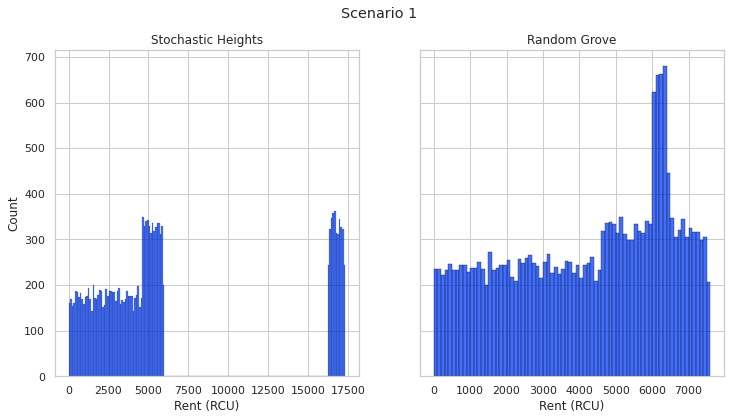

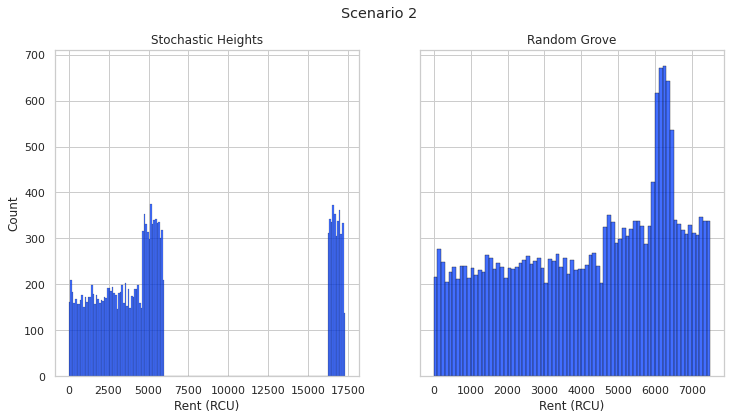

In [85]:
"""Create Distributions"""
n_sh = 16000
n_rg = 22000
mean_sh = 6300
mean_rg = 4200
median = 4600

def create_dist(n, mean, median, upper_limit, seed, k):
    """
    Function to create distribution with desired properties.
    n = the population
    mean = the desired mean
    median = the desired median 
    upper limit = upper limit of the third array, increasing this will increase the IQR
    seed = random seed
    """
    np.random.seed(seed)
    arr1 = np.random.randint(0, median-1, (n//2)-1).astype(np.float)
    arr2 = np.random.randint(median+1, upper_limit, (n//2)-1).astype(np.float)
    mid = [median-1, median+1] 
    #difference between the sum of both arrays and the mean*n 
    i = ((np.sum(arr1 + arr2) + median*2) - (mean * n)) / k
    sorted = np.argsort(arr2) #sort the array
    arr2[sorted[-k:]] -= i #subtract the difference from our 100 largest numbers 
    return np.concatenate((arr1, mid, arr2))

sh1 = create_dist(n_sh, mean_sh, median, 7000, 222, 3500)
print("sh1 mean:", np.mean(sh1))
print("sh1 median:",np.median(sh1))
print("sh1 IQR:",np.percentile(sh1,75) - np.percentile(sh1,25))
print("sh1 variance:",np.var(sh1))

sh2 = create_dist(n_sh, mean_sh, median, 7000, 223, 3500)
print("sh2 mean:", np.mean(sh2))
print("sh2 median:",np.median(sh2))
print("sh2 IQR:",np.percentile(sh2,75) - np.percentile(sh1,25))
print("sh2 variance:",np.var(sh2))

rg1 = create_dist(n_rg, mean_rg, median, 8000, 222, 5000)
print("rg1 mean:", np.mean(rg1))
print("rg1 median:",np.median(rg1))
print("rg1 IQR:",np.percentile(rg1,75) - np.percentile(rg1,25))
print("rg1 variance:",np.var(rg1))

rg2 = create_dist(n_rg, mean_rg, median, 8000, 223, 5000)
print("rg2 mean:", np.mean(rg2))
print("rg2 median:",np.median(rg2))
print("rg2 IQR:",np.percentile(rg2,75) - np.percentile(rg1,25))
print("rg2 variance:",np.var(rg2))

iqr_sh1 = np.percentile(sh1,75) - np.percentile(sh1,25)
iqr_rg1 = np.percentile(rg1,75) - np.percentile(rg1,25)
print("The IQR of the rent is smaller in SH1 than in RG1:", iqr_sh1<iqr_rg1)
iqr_sh2 = np.percentile(sh2,75) - np.percentile(sh2,25)
iqr_rg2 = np.percentile(rg2,75) - np.percentile(rg2,25)
print("The IQR of the rent is smaller in SH2 than in RG2:", iqr_sh1<iqr_rg1)

f, axs = plt.subplots(1,2,
                      figsize=(12,6),
                      sharey=True)

sns.set_theme(style="whitegrid", palette='bright')
sns.histplot(sh1, binwidth = 100, edgecolor='k', ax=axs[0])
sns.histplot(rg1, binwidth = 100, edgecolor='k', ax=axs[1])
axs[0].set(ylabel= 'Count', xlabel='Rent (RCU)', title='Stochastic Heights')
axs[1].set(xlabel='Rent (RCU)', title='Random Grove')
f.suptitle('Scenario 1')

f, axs = plt.subplots(1,2,
                      figsize=(12,6),
                      sharey=True)

sns.set_theme(style="whitegrid", palette='bright')
sns.histplot(sh2, binwidth = 100, edgecolor='k', ax=axs[0])
sns.histplot(rg2, binwidth = 100, edgecolor='k', ax=axs[1])
axs[0].set(ylabel= 'Count', xlabel='Rent (RCU)', title='Stochastic Heights')
axs[1].set(xlabel='Rent (RCU)', title='Random Grove')
f.suptitle('Scenario 2')

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

### Want SH to have a smaller IQR but a higher variance than RG.

IQR is robust to outliers while variance is not.
So, we use the k parameter (number of elements which we use to shift the mean in the function) - the greater k is the higher the variance will be, and the IQR will not change if we limit k to be from the fourth quartile (n-(n/4)).

sh1 mean: 6300.0
sh1 median: 4600.0
sh1 IQR: 3483.25
sh1 variance: 92435431.6346697
rg1 mean: 4200.0
rg1 median: 4600.0
rg1 IQR: 3823.2982
rg1 variance: 4774831.954255899
Rent in SH should have a higher variance than the rent in RG: True
The IQR of the rent is smaller in SH than in RG: True


Text(0.5, 0.98, 'Scenario 1')

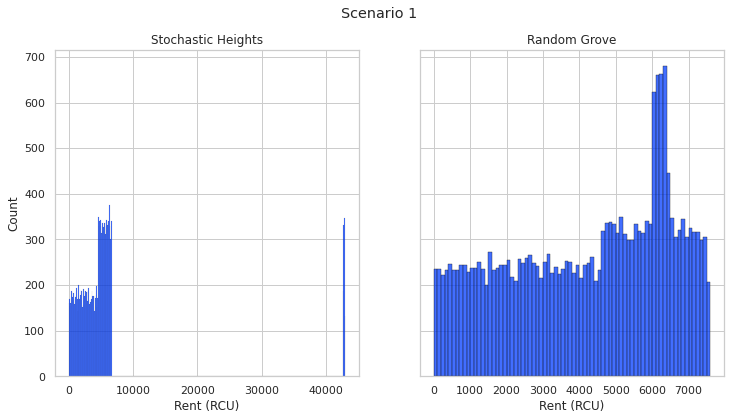

In [86]:
n_sh = 16000
n_rg = 22000
mean_sh = 6300
mean_rg = 4200
median = 4600

def create_dist(n, mean, median, upper_limit, seed, k):
    """
    Function to create distribution with desired properties.
    n = the population
    mean = the desired mean
    median = the desired median 
    upper limit = upper limit of the third array, increasing this will increase the IQR
    seed = random seed
    k = number of largest elements in array that we subtract the difference from the mean from, higher k = higher variance
    note : k should not exceed (n-(n/4))
    """
    np.random.seed(seed)
    arr1 = np.random.randint(0, median-1, (n//2)-1).astype(np.float)
    arr2 = np.random.randint(median+1, upper_limit, (n//2)-1).astype(np.float)
    mid = [median-1, median+1] 
    i = ((np.sum(arr1 + arr2) + median*2) - (mean * n)) / k #difference between the sum of both arrays and the mean*n
    sorted = np.argsort(arr2) #sort the array
    arr2[sorted[-k:]] -= i #subtract the difference from our 100 largest numbers 
    return np.concatenate((arr1, mid, arr2))

sh1 = create_dist(n_sh, mean_sh, median, 7000, 222, 1000)
print("sh1 mean:", np.mean(sh1))
print("sh1 median:",np.median(sh1))
iqr_sh1 = np.percentile(sh1,75) - np.percentile(sh1,25)
print("sh1 IQR:", iqr_sh1)
print("sh1 variance:",np.var(sh1))

rg1 = create_dist(n_rg, mean_rg, median, 8000, 222, 5000)
print("rg1 mean:", np.mean(rg1))
print("rg1 median:",np.median(rg1))
iqr_rg1 = np.percentile(rg1,75) - np.percentile(rg1,25)
print("rg1 IQR:", iqr_rg1)
print("rg1 variance:",np.var(rg1))

print("Rent in SH should have a higher variance than the rent in RG:", np.var(sh1)>np.var(rg1))
print("The IQR of the rent is smaller in SH than in RG:", iqr_sh1<iqr_rg1)

f, axs = plt.subplots(1,2,
                      figsize=(12,6),
                      sharey=True)

sns.set_theme(style="whitegrid", palette='bright')
sns.histplot(sh1, binwidth = 100, edgecolor='k', ax=axs[0])
sns.histplot(rg1, binwidth = 100, edgecolor='k', ax=axs[1])
axs[0].set(ylabel= 'Count', xlabel='Rent (RCU)', title='Stochastic Heights')
axs[1].set(xlabel='Rent (RCU)', title='Random Grove')
f.suptitle('Scenario 1')


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

We created a new function that also takes in an std parameter to set the standard deviation of each array.
By fixing the standard deviation of the rent and and manipulating the standard deviation of the PHI, we were able to create distributions with the desired covariance between rent and PHI.

In [87]:
n_sh = 16000
n_rg = 22000
mean_sh_phi = 12500
mean_rg_phi = 8500
median_sh_phi = 12000
median_rg_phi = 8000
mean_sh_rent = 6300
mean_rg_rent = 4200
median_rent = 4600

def get_normal(mean=0, std=1, lower=0, upper=10):
    # fn that uses truncnorm to sample randomly from a normal distribution, bounded by a given range
    return truncnorm((lower - mean) / std, (upper - mean) / std, loc=mean, scale=std)
    
# edited function to also take in std parameter
def create_dist_2(n, mean, median, upper_limit, seed, k, std):
    """
    Function to create distribution with desired properties.
    n = the population
    mean = the desired mean
    median = the desired median 
    upper limit = upper limit of the third array, increasing this will increase the IQR
    seed = random seed
    k = number of largest elements in array that we subtract the difference from the mean from, higher k = higher variance
    std = standard deviation of each array
    note : k should not exceed (n-(n/4))
    """
    np.random.seed(seed)
    arr1 = get_normal(mean=median//2, std = std, lower = 0, upper=median-1).rvs((n//2)-1).astype(np.float)
    arr2 = get_normal(mean=median//2, std = std, lower = median+1, upper=upper_limit).rvs((n//2)-1).astype(np.float)
    mid = [median-1, median+1] 
    i = ((np.sum(arr1 + arr2) + median*2) - (mean * n)) / k #difference between the sum of both arrays and the mean*n
    sorted = np.argsort(arr2) #sort the array
    arr2[sorted[-k:]] -= i #subtract the difference from our 100 largest numbers 
    return np.concatenate((arr1, mid, arr2))

""" Create distributions"""
sh_phi = create_dist_2(n_sh, mean_sh_phi, median_sh_phi, 20000, 222, 1000, 7000)
sh_rent = create_dist_2(n_sh, mean_sh_rent, median_rent, 7000, 222, 1000, 5000)

rg_phi = create_dist_2(n_rg, mean_rg_phi, median_rg_phi, 12000, 222, 5000, 1000) #manipulating phi std for both sh and rg to get desired covariance
rg_rent = create_dist_2(n_rg, mean_rg_rent, median_rent, 8000, 222, 5000, 3000) #fixing rent std for both sh and rg

""" check if covariance correct """
sh_goal = 0.97 * np.std(sh_rent) * np.std(sh_phi)
rg_goal = 0.89 * np.std(rg_rent) * np.std(rg_phi)

def check_cov(rent, phi, goal, city_name):
    alpha = np.round(100*(np.cov(rent, phi)[0][1]/(np.std(rent)*np.std(phi))),2) # isolate for alpha
    correct = np.cov(rent, phi)[0][1] >= goal * 0.99 and np.cov(rent, phi)[0][1] <= goal * 1.01
    print(city_name, 'Alpha of covariance between rent and PHI is:', alpha,'%') 
    print("This is within the desired range:", correct)

check_cov(sh_rent, sh_phi, sh_goal, "Stochastic Heights")
check_cov(rg_rent, rg_phi, rg_goal, "Random Grove")

"""check all other other requirements still hold"""
print("sh mean:", np.mean(sh_phi))
print("sh median:",np.median(sh_phi))
print("rg mean:", np.mean(rg_phi))
print("rg median:",np.median(rg_phi))
iqr_sh = np.percentile(sh_rent,75) - np.percentile(sh_rent,25)
iqr_rg = np.percentile(rg_rent,75) - np.percentile(rg_rent,25)
print("Rent in SH should have a higher variance than the rent in RG:", np.var(sh_rent)>np.var(rg_rent))
print("The IQR of the rent is smaller in SH than in RG:", iqr_sh<iqr_rg)


Stochastic Heights Alpha of covariance between rent and PHI is: 96.66 %
This is within the desired range: True
Random Grove Alpha of covariance between rent and PHI is: 89.28 %
This is within the desired range: True
sh mean: 12499.999999999998
sh median: 12000.0
rg mean: 8500.0
rg median: 8000.0
Rent in SH should have a higher variance than the rent in RG: True
The IQR of the rent is smaller in SH than in RG: True


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

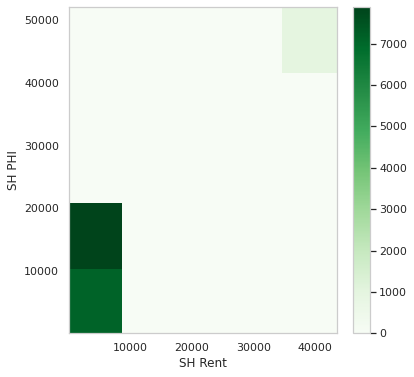

In [99]:
# group data into 5 bins
f, ax = plt.subplots(1,1, figsize=(6,6))
h = ax.hist2d(x=sh_rent,y=sh_phi,cmap = 'Greens',bins=5)
ax.set(xlabel='SH Rent')
ax.set(ylabel='SH PHI')
f.colorbar(h[3], ax=ax)


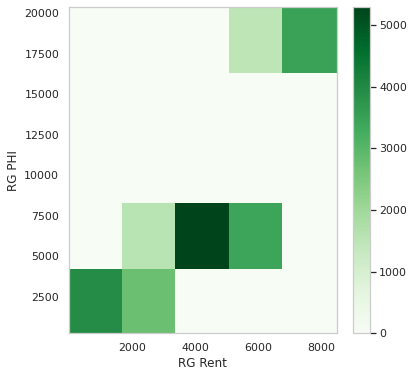

In [89]:
f, ax = plt.subplots(1,1, figsize=(6,6))
h = ax.hist2d(x=rg_rent,y=rg_phi,cmap = 'Greens',bins=5)
ax.set(xlabel='RG Rent')
ax.set(ylabel='RG PHI')
f.colorbar(h[3], ax=ax)

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [102]:
# create multinomial RV X
X = multinomial(20, [0.2,0.1,0.1,0.1,0.2,0.3]) 

# set Y= X_2 + X_3 + X_4
Y = X.rvs()[:,1:4]

[[3 2 1]]


In [100]:
# create 100 experiments where X is sampled
k = 100
Y = X.rvs(k)[:,1:4]

# calculate empirical centralized third moment of  Y based on k experiments
empirical_third_moment = np.mean((Y.sum(axis=1) - np.mean(Y.sum(axis=1)))**3)
print(empirical_third_moment)

2.1226559999999997


Calculation from class:

$\gamma ^3 = E\Bigg[\Bigg(\sum_{i=1}^{n} (X_i - p)\Bigg)^3 \Bigg]$

$\gamma ^3 = np(1-p)(1-2p)$

p is the sum of p's

In [94]:
class_formula = 20*0.3*(1-0.3)*(1-2*0.3)
print(class_formula)

1.6799999999999997


The empirical centralized third moment of  $Y$  based on our 100 experiments is not the same as the theoretical empirical third moment of the binomial dsitribution that was presented in class.
The empirical centralized third moment is based on our limited samples of the distribution, and changes accordingly when we sample randomly.
The theoretical centralized third moment is what we would expect our data to converge to if we run the experiment an infinite number of times.

1.558704348


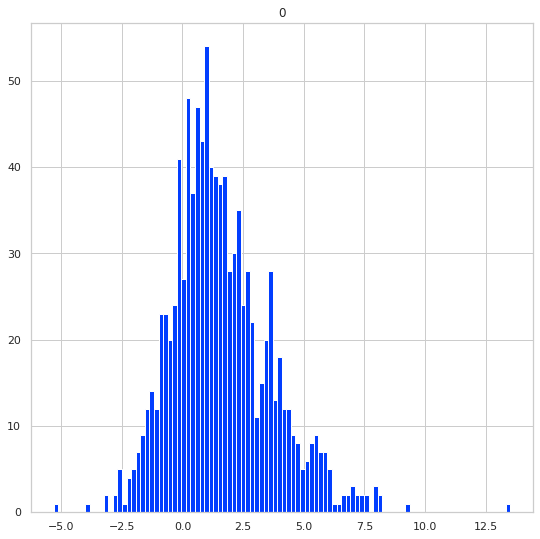

In [95]:
Y_dist = []
for i in range(1000):
  Y = X.rvs(k)[:,1:4]
  empirical_third_moment = np.mean((Y.sum(axis=1) - np.mean(Y.sum(axis=1)))**3)
  Y_dist.append(empirical_third_moment)

pd.DataFrame(Y_dist).hist(bins=100, figsize=(9,9))
print(np.mean(Y_dist))

As we can see from the histogram, if we repeat the experiment many times it will begin to converge to the theoretical centralized third moment (1.679).

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

$$\text{Let} \;Var(X+Y+Z)=Var(X+T) \; \text{where} \; T=Y+Z$$

$$Var(X+T) = Var(X) + Var(T) + 2Cov(X,T)$$

$$= Var(X) + Var(Y+Z) + 2Cov(X,Y+Z)$$

$$= Var(X) + Var(Y) + Var(Z) + 2Cov(Y,Z) + 2Cov(X, Y+Z)$$ 

$$ \text{Recall and apply the definition of covariance:} \; Cov(M,N)=E(MN) - E(M)E(N)$$ 

$$Cov(X, Y+Z) = E(X(Y+Z)) - E(X)E(Y+Z)$$ 

$$= E(XY + XZ) - E(X)E(Y+Z)$$ 

$$= E(XY) + E(XZ) - E(X)[E(Y)+E(Z)] \; \text{by linearity of expectations} $$

$$= E(XY) - E(X)E(Y) + E(XZ) - E(X)E(Z)$$ 

$$= Cov(X,Y) + Cov(X,Z) \; \text{Now plug back into our original expression} $$

$$Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z) + 2[Cov(X,Y) + Cov(X,Z) + Cov(Y,Z)]$$ 

$$\text{Q.E.D.}$$

If $X,Y,Z$ are pairwise independent, they are not necessarily collectively independent. \\
Consider the case where $X$, $Y$, and $Z$ represent the number of times the faces of a three-sided die appear within 10 rolls. $X$ refers to the first face, $Y$ the second face, $Z$ the third face. $X$, $Y$, and $Z$ are pairwise independent in this case, meaning if I know that roll six lands on the first face, I don't know which face will land on roll seven. But collectively these variable are dependent. Namely if I know how many times the first or second face shows up out of $10$ rolls, it tells me information about how many times the third face shows up. 


### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [96]:
def NFoldConv(P,n):
    """
    P = a distribution of a random variable that takes finitely many
    integer values as a list with P[0] = the values and P[1] = the distribution
    n = an integer
    returns distribution Q of the sum of n independent repeats of random variables (each with distribution P)
    """

    if n == 1:
        Q = P[1]
        return Q
    
    if n == 2:
        Q = np.convolve(P[1],P[1])
        return Q
    
    Q = np.convolve(P[1],P[1])
    for i in range(n-2): # start at n-2 two because initializing at the convolution of P with itself (once)
        Q = np.convolve(Q, P[1])
    return [P[0], Q]

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [97]:
P = [[1,2,3,4,5,6,7,8],[1/8]*8]
NFoldConv(P, 17) 

[[1, 2, 3, 4, 5, 6, 7, 8],
 array([4.44089210e-16, 7.54951657e-15, 6.79456491e-14, 4.30322444e-13,
        2.15161222e-12, 9.03677133e-12, 3.31348282e-11, 1.08871578e-10,
        3.26607186e-10, 9.07134812e-10, 2.35772912e-09, 5.78267301e-09,
        1.34733957e-08, 2.99840073e-08, 6.40173488e-08, 1.31615841e-07,
        2.61380925e-07, 5.02742224e-07, 9.38663699e-07, 1.70459936e-06,
        3.01597023e-06, 5.20688185e-06, 8.78316811e-06, 1.44930374e-05,
        2.34184931e-05, 3.70901651e-05, 5.76270894e-05, 8.79011761e-05,
        1.31723541e-04, 1.94046516e-04, 2.81171100e-04, 4.00945025e-04,
        5.62931924e-04, 7.78527660e-04, 1.06099643e-03, 1.42539740e-03,
        1.88837308e-03, 2.46777400e-03, 3.18210121e-03, 4.04975813e-03,
        5.08811743e-03, 6.31242493e-03, 7.73458068e-03, 9.36185625e-03,
        1.11956238e-02, 1.32301865e-02, 1.54518068e-02, 1.78380317e-02,
        2.03574043e-02, 2.29696365e-02, 2.56262914e-02, 2.82719922e-02,
        3.08461375e-02, 3.32850623e-0